*Load* the dataset API key!

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


The following 2 code boxes are used to connect the dataset API and load the data to colab

In [ ]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# To protect API key
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize the Kaggle API
api = KaggleApi()
api.authenticate()

# Download the file
api.dataset_download_files('ranadeep/credit-risk-dataset', path='/content/data/credit-risk-dataset/', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/ranadeep/credit-risk-dataset


In [ ]:
#%pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

sns.set_style('whitegrid')

from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score

In [ ]:
df_loan = pd.read_csv("/content/data/credit-risk-dataset/loan/loan.csv")
df_loan.head(7)

/tmp/ipython-input-5-2656847041.py:1: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df_loan = pd.read_csv("/content/data/credit-risk-dataset/loan/loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_loan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [ ]:
###Removing Irrelevant coloumn
columns_to_keep = ['loan_amnt','term','int_rate','installment','grade','emp_length','home_ownership','annual_inc','verification_status','loan_status','purpose']
df_clean = df_loan[columns_to_keep]

In [ ]:
#Find any missing values in the dataset
df_clean.isnull().sum()


,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
emp_length,44825
home_ownership,0
annual_inc,4
verification_status,0
loan_status,0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            887379 non-null  float64
 1   term                 887379 non-null  object 
 2   int_rate             887379 non-null  float64
 3   installment          887379 non-null  float64
 4   grade                887379 non-null  object 
 5   emp_length           842554 non-null  object 
 6   home_ownership       887379 non-null  object 
 7   annual_inc           887375 non-null  float64
 8   verification_status  887379 non-null  object 
 9   loan_status          887379 non-null  object 
 10  purpose              887379 non-null  object 
dtypes: float64(4), object(7)
memory usage: 74.5+ MB


In [ ]:
df_clean.head(10)


,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose
0,5000.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card
1,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,car
2,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business
3,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,other
4,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Current,other
5,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding
6,7000.0,60 months,15.96,170.08,C,8 years,RENT,47004.0,Not Verified,Current,debt_consolidation
7,3000.0,36 months,18.64,109.43,E,9 years,RENT,48000.0,Source Verified,Fully Paid,car
8,5600.0,60 months,21.28,152.39,F,4 years,OWN,40000.0,Source Verified,Charged Off,small_business
9,5375.0,60 months,12.69,121.45,B,< 1 year,RENT,15000.0,Verified,Charged Off,other


In [ ]:
df_clean.annual_inc.fillna(0)
df_clean.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
emp_length,44825
home_ownership,0
annual_inc,4
verification_status,0
loan_status,0


In [ ]:
df_clean['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [ ]:
import pandas as pd

# Assuming df_clean is your DataFrame and it's a slice of another DataFrame
# Use .loc to avoid SettingWithCopyWarning
df_clean.loc[:, 'loan_status'] = df_clean['loan_status'].replace({
    'Fully Paid': 0,
    'Does not meet the credit policy. Status:Fully Paid': 0,
    'Current': 0,
    'Late (31-120 days)': 1,
    'Late (16-30 days)': 1,
    'In Grace Period': 1,
    'Charged Off': 1,
    'Default': 1,
    'Does not meet the credit policy. Status:Charged Off': 1
}).astype('category')  # Convert back to category if needed



In [ ]:
df_clean = df_clean.rename(columns={'loan_status': 'label'})

#Convert label to Numeric
df_clean['label'] = pd.to_numeric(df_clean['label'], errors='coerce')

In [ ]:
print(df_clean['label'].isnull().sum())  # Check for NaN values

8460


In [ ]:
df_clean['label'] = df_clean['label'].fillna(df_clean['label'].mode()[0])


In [ ]:
# label several label with specific grading system.
def SC_LabelEncoder1(text):
    if text == "E":
        return 1
    elif text == "D":
        return 2
    elif text == "C":
        return 3
    elif text == "B":
        return 4
    elif text == "A":
        return 5
    else:
        return 0


def SC_LabelEncoder2(text):
    if text == "< 1 year":
        return 1
    elif text == "1 year":
        return 2
    elif text == "2 years":
        return 3
    elif text == "3 years":
        return 4
    elif text == "4 years":
        return 5
    elif text == "5 years":
        return 6
    elif text == "6 years":
        return 7
    elif text == "7 years":
        return 8
    elif text == "8 years":
        return 9
    elif text == "9 years":
        return 10
    elif text == "10 years":
        return 11
    elif text == "10+ years":
        return 12
    else:
        return 0

def SC_LabelEncoder3(text):
    if text == "RENT":
        return 1
    elif text == "MORTGAGE":
        return 2
    elif text == "OWN":
        return 3
    else:
        return 0

df_clean["grade"] = df_clean["grade"].apply(SC_LabelEncoder1)
df_clean["emp_length"] = df_clean["emp_length"].apply(SC_LabelEncoder2)
df_clean["home_ownership"] = df_clean["home_ownership"].apply(SC_LabelEncoder3)

In [ ]:
print(df_clean[['grade', 'emp_length', 'home_ownership']].describe())

               grade     emp_length  home_ownership
count  887379.000000  887379.000000   887379.000000
mean        3.207783       6.983232        1.696728
std         1.295023       4.265429        0.639508
min         0.000000       0.000000        0.000000
25%         2.000000       3.000000        1.000000
50%         3.000000       7.000000        2.000000
75%         4.000000      12.000000        2.000000
max         5.000000      12.000000        3.000000


In [ ]:
df_clean.head(10)

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,label,purpose
0,5000.0,36 months,10.65,162.87,4,12,1,24000.0,Verified,0.0,credit_card
1,2500.0,60 months,15.27,59.83,3,1,1,30000.0,Source Verified,1.0,car
2,2400.0,36 months,15.96,84.33,3,12,1,12252.0,Not Verified,0.0,small_business
3,10000.0,36 months,13.49,339.31,3,12,1,49200.0,Source Verified,0.0,other
4,3000.0,60 months,12.69,67.79,4,2,1,80000.0,Source Verified,0.0,other
5,5000.0,36 months,7.90,156.46,5,4,1,36000.0,Source Verified,0.0,wedding
6,7000.0,60 months,15.96,170.08,3,9,1,47004.0,Not Verified,0.0,debt_consolidation
7,3000.0,36 months,18.64,109.43,1,10,1,48000.0,Source Verified,0.0,car
8,5600.0,60 months,21.28,152.39,0,5,3,40000.0,Source Verified,1.0,small_business
9,5375.0,60 months,12.69,121.45,4,1,1,15000.0,Verified,1.0,other


In [ ]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            887379 non-null  float64
 1   term                 887379 non-null  object 
 2   int_rate             887379 non-null  float64
 3   installment          887379 non-null  float64
 4   grade                887379 non-null  int64  
 5   emp_length           887379 non-null  int64  
 6   home_ownership       887379 non-null  int64  
 7   annual_inc           887375 non-null  float64
 8   verification_status  887379 non-null  object 
 9   label                887379 non-null  float64
 10  purpose              887379 non-null  object 
dtypes: float64(5), int64(3), object(3)
memory usage: 74.5+ MB


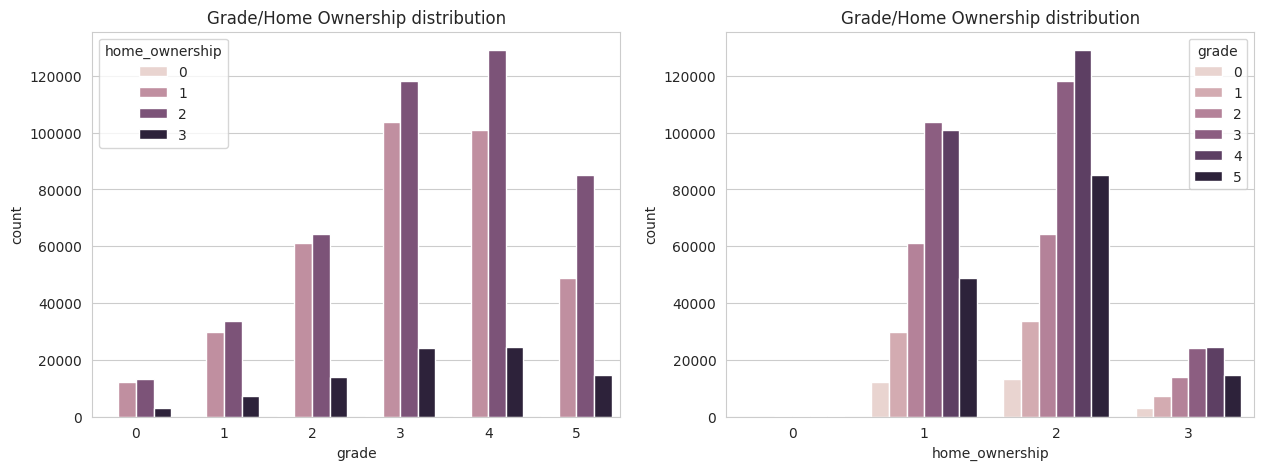

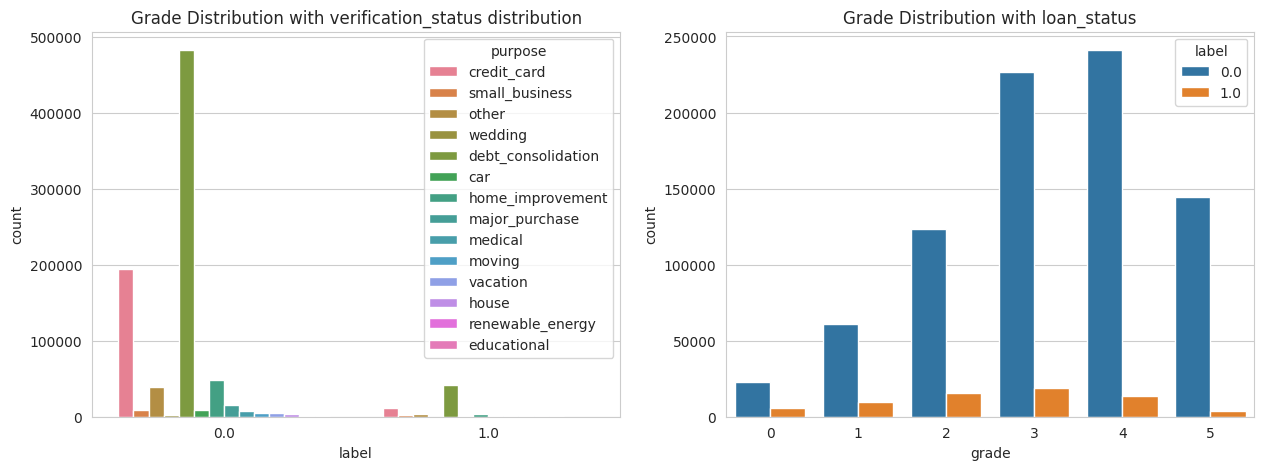

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df_clean, x='grade', hue="home_ownership", ax=ax[0]).set_title("Grade/Home Ownership distribution");
sns.countplot(data=df_clean, x='home_ownership', hue='grade', ax=ax[1]).set_title("Grade/Home Ownership distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df_clean, x='label', hue='purpose', ax=ax[0]).set_title("Grade Distribution with verification_status distribution");
sns.countplot(data=df_clean, x='grade', hue='label', ax=ax[1]).set_title("Grade Distribution with loan_status");

###Analysis :
The number of Borrowers with high grade will be small compared to low grade
Most money borrowers' goals from labels 0 and 1 are debt consolidation
The highest number of grades who were able to complete the loan was grade 4, while the most failed to complete the loan was grade 3

Text(0.5, 1.0, 'Loan amounts grouped by purpose')

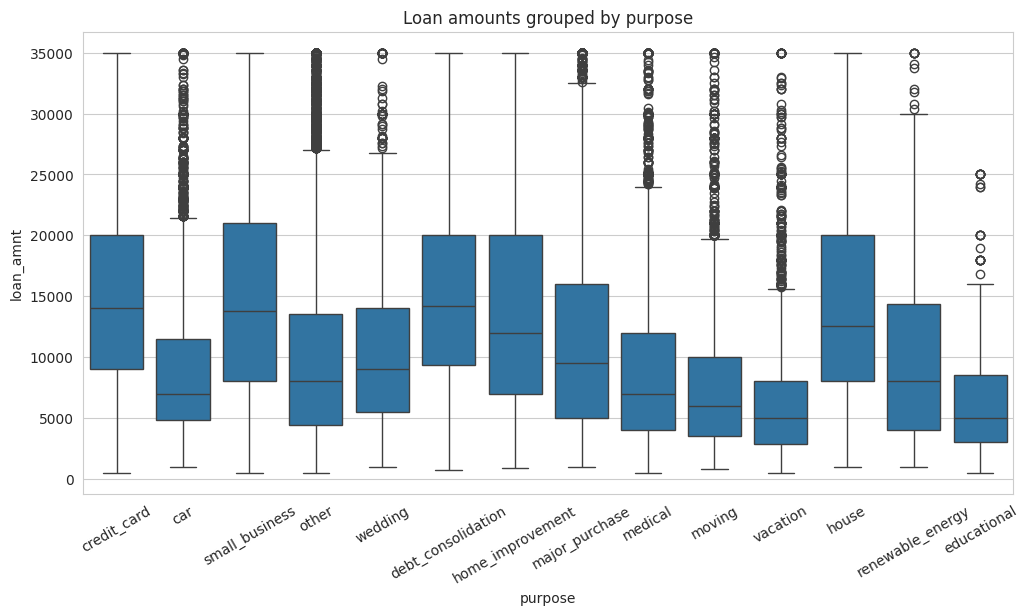

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='purpose', y='loan_amnt', data=df_clean)
plt.xticks(rotation=30)
plt.title('Loan amounts grouped by purpose')

Analysis :
There are 5 highest categories for the amount of credit with the following purposes: Credit card, MSME business, debt consolidation, home improvement, and buying a house

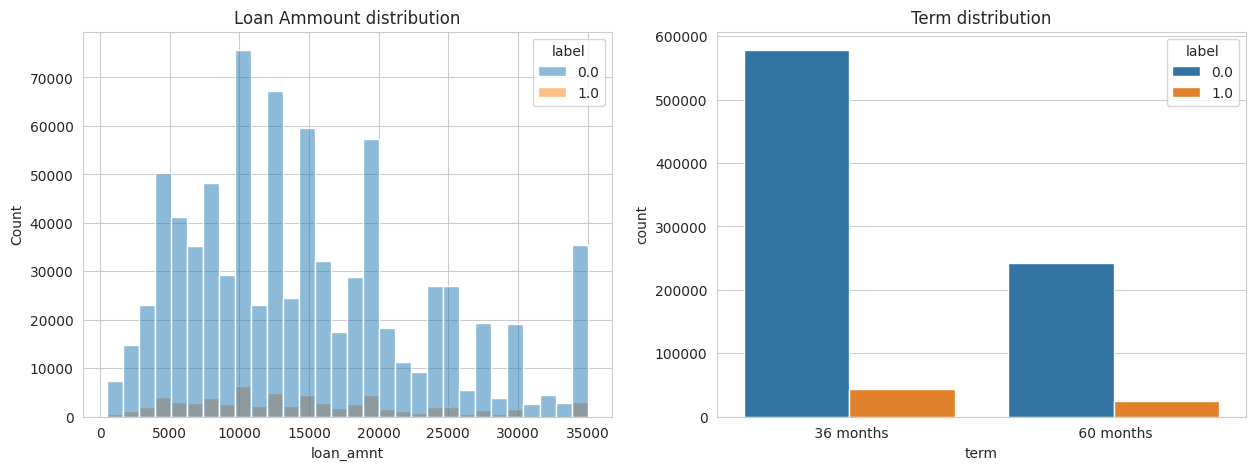

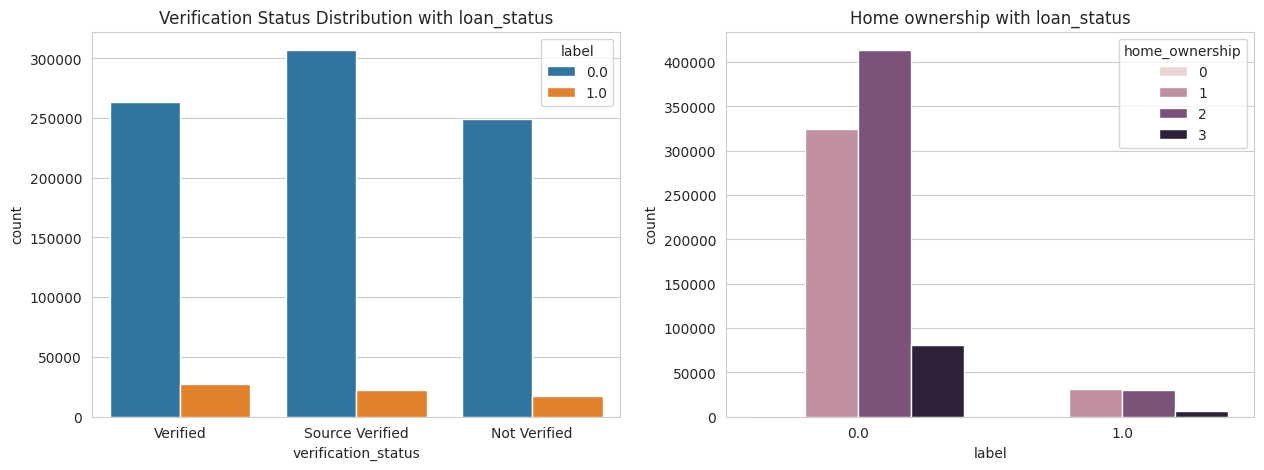

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df_clean, x='loan_amnt',hue="label", bins=30, ax=ax[0]).set_title("Loan Ammount distribution");
sns.countplot(data=df_clean, x='term', hue="label", ax=ax[1]).set_title("Term distribution");

fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(data=df_clean, hue='home_ownership', x='label', ax=ax[1]).set_title("Home ownership with loan_status");
sns.countplot(data=df_clean, x='verification_status', hue='label', ax=ax[0]).set_title("Verification Status Distribution with loan_status");

In [ ]:
df_clean['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

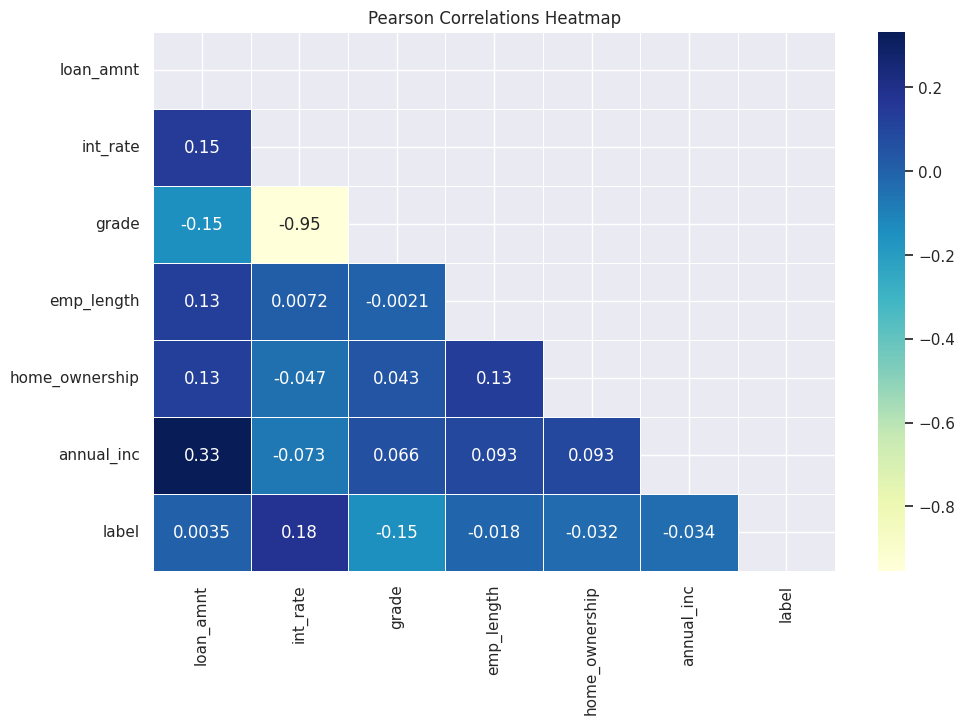

In [ ]:
corr = df_clean[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc','label']].corr()
sns.set(rc={'figure.figsize':(11,7)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=np.bool)))\
    .set_title("Pearson Correlations Heatmap");

In [ ]:
# use LabelEncoder() to encode another category column:
for col in ["verification_status", "purpose","term"]:
    le = LabelEncoder()
    le.fit(df_clean[col])
    df_clean[col] = le.transform(df_clean[col])
df_clean.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,label,purpose
0,5000.0,0,10.65,162.87,4,12,1,24000.0,2,0.0,1
1,2500.0,1,15.27,59.83,3,1,1,30000.0,1,1.0,0
2,2400.0,0,15.96,84.33,3,12,1,12252.0,0,0.0,11
3,10000.0,0,13.49,339.31,3,12,1,49200.0,1,0.0,9
4,3000.0,1,12.69,67.79,4,2,1,80000.0,1,0.0,9


In [ ]:
df_clean.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
emp_length,0
home_ownership,0
annual_inc,4
verification_status,0
label,0


In [ ]:
df_clean['annual_inc'] = df_clean['annual_inc'].fillna(df_clean['annual_inc'].mean())

In [ ]:
df_clean.label = df_clean.label.fillna(1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

### SVM


In [ ]:
from sklearn.svm import SVC

In [ ]:
X = df_clean.drop('label', axis=1)
Y = df_clean['label']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
svc = SVC() #Model building
svc.fit(X_train, Y_train) #Model Training

In [ ]:
#Model Prediction
Y_svc_pred = svc.predict(X_test)

In [ ]:
Y_svc_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [ ]:
results_diff = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_svc_pred})
results_diff

,Actual,Predicted
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,1,1
534,0,0
344,0,0
296,1,0


In [ ]:
print(f'Accuracy score for SVM classifier: {accuracy_score(Y_test, Y_svc_pred)}')

Accuracy score for SVM classifier: 0.7662337662337663


In [ ]:
import seaborn as sb

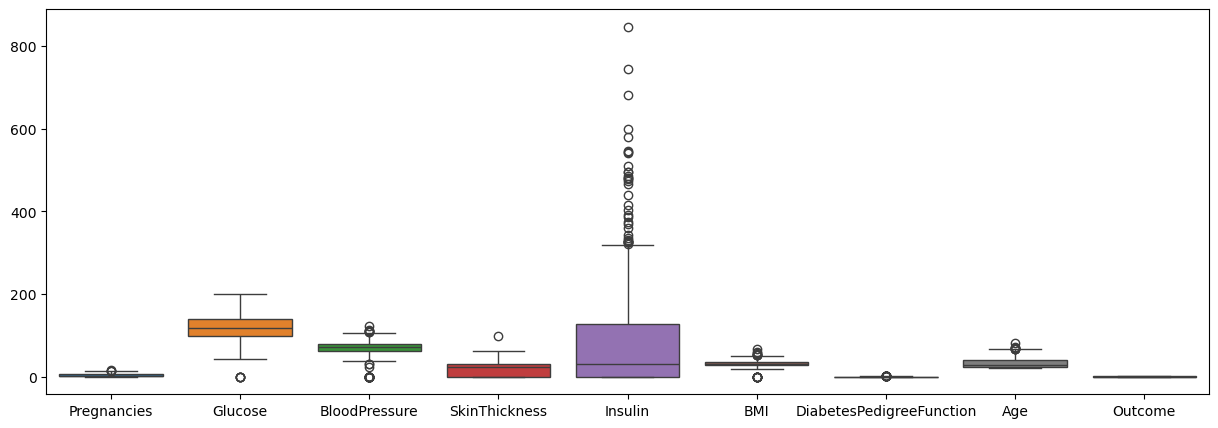

In [ ]:
plt.figure(figsize=(15, 5))
sb.boxplot(data=data)
plt.show()

In [ ]:
svc_opt_rbf = SVC(C=1)
svc_opt_rbf.fit(X_train, Y_train)

Y_pred = svc_opt_rbf.predict(X_test)
print(f'Accuracy score with C=1 and rbf kernel: {accuracy_score(Y_test, Y_pred)}')

Accuracy score with C=1 and rbf kernel: 0.7662337662337663


In [ ]:
#Since there are more outliers, increasing the value of C decreases the outliers
svc_opt_rbf = SVC(C=100)
svc_opt_rbf.fit(X_train, Y_train)

Y_pred = svc_opt_rbf.predict(X_test)
print(f'Accuracy score with C=100 and linear kernel: {accuracy_score(Y_test, Y_pred)}')

Accuracy score with C=100 and linear kernel: 0.7402597402597403


In [ ]:
svc_opt_rbf = SVC(C=1000)
svc_opt_rbf.fit(X_train, Y_train)

Y_pred = svc_opt_rbf.predict(X_test)
print(f'Accuracy score with C=1000 and linear kernel: {accuracy_score(Y_test, Y_pred)}')

Accuracy score with C=1000 and linear kernel: 0.7077922077922078


In [ ]:
svc_opt_linear = SVC(kernel='linear', C=1)
svc_opt_linear.fit(X_train, Y_train)
Y_pred = svc_opt_linear.predict(X_test)
print(f'Accuracy score for C=1 and linear kernel: {accuracy_score(Y_test, Y_pred)}')

Accuracy score for C=1 and linear kernel: 0.7532467532467533


In [ ]:
svc_opt_linear = SVC(kernel='linear', C=100)
svc_opt_linear.fit(X_train, Y_train)
Y_pred = svc_opt_linear.predict(X_test)
print(f'Accuracy score for C=100 and linear kernel: {accuracy_score(Y_test, Y_pred)}')

Accuracy score for C=100 and linear kernel: 0.7272727272727273


In [ ]:
svc_opt_linear = SVC(kernel='linear', C=1000)
svc_opt_linear.fit(X_train, Y_train)
Y_pred = svc_opt_linear.predict(X_test)
print(f'Accuracy score for C=1000 and linear kernel: {accuracy_score(Y_test, Y_pred)}')

Accuracy score for C=1000 and linear kernel: 0.7337662337662337


In [ ]:
svc_opt_poly = SVC(kernel='poly', C=1)
svc_opt_poly.fit(X_train, Y_train)
Y_pred = svc_opt_poly.predict(X_test)
print(f'Accuracy score for C=1 and poly kernel: {accuracy_score(Y_test, Y_pred)}')

Accuracy score for C=1 and poly kernel: 0.7597402597402597


In [ ]:
svc_opt_poly = SVC(kernel='poly', C=100)
svc_opt_poly.fit(X_train, Y_train)
Y_pred = svc_opt_poly.predict(X_test)
print(f'Accuracy score for C=100 and poly kernel: {accuracy_score(Y_test, Y_pred)}')

Accuracy score for C=100 and poly kernel: 0.7532467532467533


In [ ]:
svc_opt_poly = SVC(kernel='poly', C=1000)
svc_opt_poly.fit(X_train, Y_train)
Y_pred = svc_opt_poly.predict(X_test)
print(f'Accuracy score for C=1000 and poly kernel: {accuracy_score(Y_test, Y_pred)}')

Accuracy score for C=1000 and poly kernel: 0.7337662337662337


In [ ]:
svc_opt = SVC(kernel='linear', C=1, probability=True)
svc_opt.fit(X_train, Y_train)
Y_pred = svc_opt.predict(X_test)

### Clustering

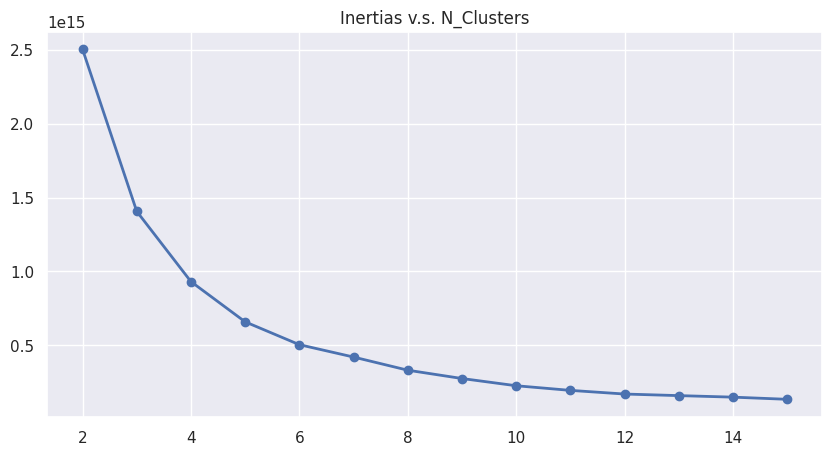

In [ ]:
inertias = []

for i in range(2,16):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_clean)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.title('Inertias v.s. N_Clusters')
plt.plot(np.arange(2,16),inertias, marker='o', lw=2);

### Analysis:
"Elbow" on the chart above is at 4. The number of clusters must be 4.

In [ ]:
km = KMeans(n_clusters=4, random_state=0)
clusters = km.fit_predict(df_clean)

In [ ]:
df_clustered = df_clean[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose']]
df_clustered["Cluster"].loc [:, 'clusters']

sns.pairplot(df_clustered[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose'
                           , "Cluster"]], hue="Cluster");

KeyError: 'Cluster'

In [ ]:
X, y = df_loan.drop("label", axis=1), df_clean["label"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
max_score = 0
max_k = 0
for k in range(1, 100):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train,y_train)
    score = f1_score(y_test, neigh.predict(X_test),average='micro')
    if score > max_score:
        max_k = k
        max_score = score

In [ ]:
print('If we use K-Nearest Neighbors Classification, then the value of K is',str(max_k),' to get the best prediction, then the average accuracy is ', max_score)

### Random forest
### Isolation Forest


In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, max_samples=256, random_state=42)
iso_forest.fit(df_clustered)

IsolationForest(contamination=0.05, max_samples=256, random_state=42)

In [ ]:
df_clustered = df_clean[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose']]
df_clustered["Random_Forest"].loc [:, 'clusters']

sns.pairplot(df_clustered[['loan_amnt', 'int_rate', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'purpose'
                           , "Cluster"]], hue="Cluster");

KeyError: 'Random_Forest'

In [ ]:
X, y = df_loan.drop("label", axis=1), df_clean["label"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)